# Weekly Rate of Return, Sharpe, Jensen, Betas, and Mean Variance Weights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from tabulate import tabulate
import math
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf

In [2]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

one_yr_ago = datetime.now() - relativedelta(years=1)
one_yr_ago = one_yr_ago.strftime("%Y-%m-%d")

start = one_yr_ago 
end = datetime.now().strftime("%Y-%m-%d")
symbols = ['FDS','INVH', 'ROL', 'RBLX', 'HIG', 'SNOW']

In [3]:
all_df = yf.download(symbols, start, end)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [4]:
df = all_df[symbols]

In [5]:
df = df.reset_index() 

In [6]:
df

,Date,FDS,INVH,ROL,RBLX,HIG,SNOW
0,2022-08-05,419.673248,36.814873,37.131451,49.240002,62.684643,165.529999
1,2022-08-08,419.911163,37.069038,37.309208,48.900002,63.114517,170.850006
2,2022-08-09,420.109497,37.587147,36.675507,47.349998,64.247841,160.550003
3,2022-08-10,431.163666,38.066147,36.962658,48.009998,65.283470,174.399994
4,2022-08-11,429.428711,38.017269,36.289349,49.560001,66.104164,167.880005
...,...,...,...,...,...,...,...
246,2023-07-31,435.040009,35.500000,40.830002,39.250000,71.879997,177.710007
247,2023-08-01,433.589996,35.360001,40.630001,39.430000,71.989998,176.580002
248,2023-08-02,434.100006,35.439999,41.299999,37.630001,72.190002,164.600006
249,2023-08-03,431.040009,35.160000,40.689999,36.680000,72.599998,161.050003


# Weekly returns (I assumed rolling average)

In [7]:
weekly_returns = df[symbols].pct_change(periods=5) # go by business days 

In [8]:
weekly_returns = weekly_returns.dropna()

In [9]:
weekly_returns

,FDS,INVH,ROL,RBLX,HIG,SNOW
5,0.041955,0.051248,-0.014146,0.038790,0.074813,0.019030
6,0.054397,0.049051,-0.020701,0.001227,0.066254,-0.002400
7,0.056496,0.035370,0.012149,0.008659,0.059763,0.042354
8,0.041274,0.020288,-0.007769,-0.039783,0.038312,-0.075172
9,0.048667,-0.002314,0.014734,-0.090194,0.031629,-0.036514
...,...,...,...,...,...,...
246,-0.003892,-0.018252,-0.087598,-0.007585,-0.039551,0.016648
247,-0.012863,-0.005345,-0.093687,-0.005799,-0.033821,-0.015115
248,-0.014350,-0.002252,-0.078125,-0.058073,-0.045863,-0.031765
249,-0.010105,0.007739,-0.003185,-0.032445,-0.045616,-0.042907


In [10]:
weekly_returns['FDS'].mean(),weekly_returns['FDS'].std()

(0.0010325719267891141, 0.036976604873123126)

In [11]:
weekly_returns['INVH'].mean(),weekly_returns['INVH'].std()

(-0.0006306756087907826, 0.03561458381204492)

In [12]:
weekly_returns['ROL'].mean(),weekly_returns['ROL'].std()

(0.0026803713612954193, 0.03648137373189697)

In [13]:
weekly_returns['RBLX'].mean(),weekly_returns['RBLX'].std()

(-0.0006772432990716178, 0.0921002454882214)

In [14]:
weekly_returns['HIG'].mean(),weekly_returns['HIG'].std()

(0.002868762169384594, 0.031230312943483874)

<Axes: >

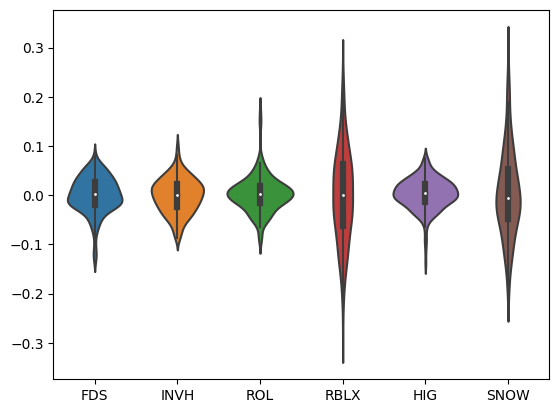

In [15]:
sns.violinplot(data=weekly_returns)

In [16]:
[i for i in weekly_returns.std().values]

[0.036976604873123126,
 0.03561458381204492,
 0.03648137373189697,
 0.0921002454882214,
 0.031230312943483874,
 0.08823519839756065]

In [17]:
weekly_returns.columns

Index(['FDS', 'INVH', 'ROL', 'RBLX', 'HIG', 'SNOW'], dtype='object')

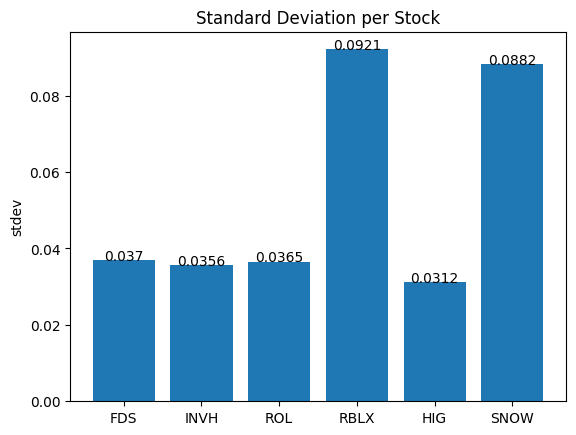

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

algs = symbols
counts = [round(i, 4) for i in weekly_returns.std().values]
bar_labels = ['xkcd:poop','xkcd:baby puke green', 'xkcd:baby poop green','xkcd:baby poop','#4b5d16']
bar_colors = bar_labels

ax.bar(algs, counts)

ax.set_ylabel('stdev')
ax.set_title('Standard Deviation per Stock')
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(algs, counts)
plt.show()

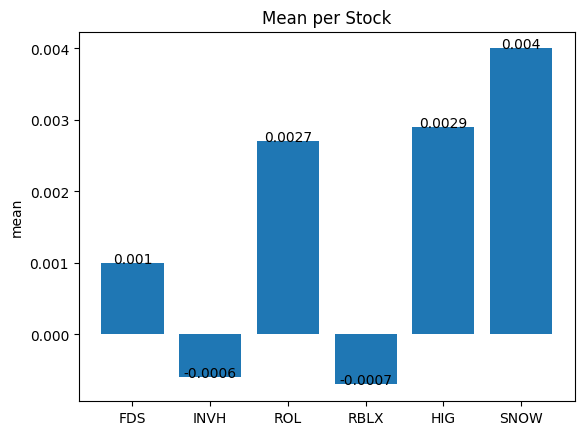

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

algs = symbols
counts = [round(i, 4) for i in weekly_returns.mean().values]
bar_labels = ['xkcd:poop','xkcd:baby puke green', 'xkcd:baby poop green','xkcd:baby poop','#4b5d16']
bar_colors = bar_labels

ax.bar(algs, counts)

ax.set_ylabel('mean')
ax.set_title('Mean per Stock')
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(algs, counts)
plt.show()

# Standard Deviation and Sharpe Ratio

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fmin
import math


In [21]:
def std_dev_portfolio(weekly_returns, W):
    return np.dot(W,  np.array(np.std(weekly_returns, axis=0)))

In [22]:
def sharpe_ratio(daily_returns, W,risk_free_rate=0.0):
    # Calculate aggregated Sharpe Ratio
    daily_sharpe_ratio = (np.dot(W,  np.array(np.mean(daily_returns, axis=0))) - risk_free_rate) 
    daily_sharpe_ratio = daily_sharpe_ratio/np.dot(W,  np.array(np.std(daily_returns, axis=0)))
    sharpe_ratio = daily_sharpe_ratio 
    return sharpe_ratio

In [23]:
  np.array(np.mean(weekly_returns, axis=0))

array([ 0.00103257, -0.00063068,  0.00268037, -0.00067724,  0.00286876,
        0.00397105])

# Sharpe Ratio and Standard Deviation (equal weights)

In [24]:
print('Symbols: ', symbols)

equal_weighted = [1/len(symbols) for i in range(len(symbols))]
print("with weights: ", equal_weighted)
stocks_df = all_df 
daily_returns = df[symbols].pct_change()
print('Portfolio Sharpe ratio: ',round(sharpe_ratio(daily_returns, equal_weighted), 4))

print('Standard deviation: ',round(std_dev_portfolio(daily_returns, equal_weighted), 4))

Symbols:  ['FDS', 'INVH', 'ROL', 'RBLX', 'HIG', 'SNOW']
with weights:  [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
Portfolio Sharpe ratio:  0.0139
Standard deviation:  0.0256


## YAY!!!: improved performance with LSTM predicted importance 

In [25]:
opt_weights = [3.44608226e-01, 6.12683089e-02, 8.42134112e-02, 2.97174507e-08,
       3.81387918e-01, 1.28522106e-01]

In [26]:
print('Symbols: ', symbols)

print("with weights: ", opt_weights)
stocks_df = all_df 
daily_returns = df[symbols].pct_change()
print('Portfolio Sharpe ratio: ',round(sharpe_ratio(weekly_returns, opt_weights), 4))

print('Standard deviation: ',round(std_dev_portfolio(weekly_returns, opt_weights), 4))

Symbols:  ['FDS', 'INVH', 'ROL', 'RBLX', 'HIG', 'SNOW']
with weights:  [0.344608226, 0.0612683089, 0.0842134112, 2.97174507e-08, 0.381387918, 0.128522106]
Portfolio Sharpe ratio:  0.0522
Standard deviation:  0.0412


In [27]:
def mean_portfolio(weekly_returns, W):
    return np.dot(W,  np.array(np.mean(weekly_returns, axis=0)))
print('mean: ',round(mean_portfolio(weekly_returns, opt_weights), 4))

mean:  0.0021


# Beta Calculation

In [28]:
def get_return_portfolio(W,stocks):
    df = stocks.pct_change()
    return np.sum(df[1:] * W,axis=1)

In [29]:
m= yf.download('SPY', start, end)
m= m[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [30]:
stock = get_return_portfolio(np.array(opt_weights),df[symbols])
market = m.pct_change()[1:]
stock

1      0.007768
2     -0.001311
3      0.027742
4     -0.003010
5      0.016079
         ...   
246   -0.000478
247   -0.002036
248   -0.005727
249   -0.004763
250   -0.004636
Length: 250, dtype: float64

In [31]:
beta_df = pd.DataFrame({'Stock':stock.values, 'Market':market["Adj Close"].values})

In [32]:
# for the portfolio 
beta  = (beta_df[['Stock','Market']].cov()/beta_df['Market'].var()).iloc[0].iloc[1]
print('Beta for the portfolio: ', beta.round(4))

Beta for the portfolio:  0.9176


## Individual Betas

In [33]:
def beta(stocks_return, market_return):
    beta_df =pd.DataFrame({'Stock':stocks_return.values, 'Market':market_return.values})
    cov_m = beta_df[['Stock','Market']].cov()
    beta =  cov_m / (np.std(market_return)**2)
    return beta.iloc[0].iloc[1]

In [34]:
market_symbol ='SPY'
market = yf.download(market_symbol, start=start, end=end)['Adj Close']
FDSstock = yf.download('FDS', start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
market_return = (market.dropna()/market.shift(1).dropna()) -1
FDSstock_return = (FDSstock.dropna()/FDSstock.shift(1).dropna()) -1

print("FDS Beta: ", beta(FDSstock_return, market_return))
FDSbeta = beta(FDSstock_return, market_return)

FDS Beta:  0.8731288594483645


In [36]:
INVHstock = yf.download('INVH', start=start, end=end)['Adj Close']
market_return = market.pct_change().dropna()
INVHstock_return = INVHstock.pct_change().dropna()
print("INVH Beta: ", beta(INVHstock_return, market_return))
INVHbeta = beta(INVHstock_return, market_return)

[*********************100%***********************]  1 of 1 completed
INVH Beta:  0.962008848608418


In [37]:
ROLstock = yf.download('ROL', start=start, end=end)['Adj Close']
market_return = market.pct_change().dropna()
ROLstock_return = ROLstock.pct_change().dropna()
print("ROL Beta: ", beta(ROLstock_return, market_return))
ROLbeta = beta(ROLstock_return, market_return)

[*********************100%***********************]  1 of 1 completed
ROL Beta:  0.48093219108867064


In [38]:
RBLXstock = yf.download('RBLX', start=start, end=end)['Adj Close']
market_return = market.pct_change().dropna()
RBLXstock_return = RBLXstock.pct_change().dropna()
print("RBLX Beta: ", beta(RBLXstock_return, market_return))
RBLXbeta = beta(RBLXstock_return, market_return)

[*********************100%***********************]  1 of 1 completed
RBLX Beta:  2.003301728655369


In [39]:
HIGstock = yf.download('HIG', start=start, end=end)['Adj Close']
market_return = market.pct_change().dropna()
HIGstock_return = HIGstock.pct_change().dropna()
print("HIG Beta: ", beta(HIGstock_return, market_return))
HIGbeta = beta(HIGstock_return, market_return)

[*********************100%***********************]  1 of 1 completed
HIG Beta:  0.7692543488769129


In [40]:
SNOWstock = yf.download('SNOW', start=start, end=end)['Adj Close']
market_return = market.pct_change().dropna()
SNOWstock_return = SNOWstock.pct_change().dropna()
print("SNOW Beta: ", beta(SNOWstock_return, market_return))
SNOWbeta = beta(SNOWstock_return, market_return)

[*********************100%***********************]  1 of 1 completed
SNOW Beta:  1.770920771925484


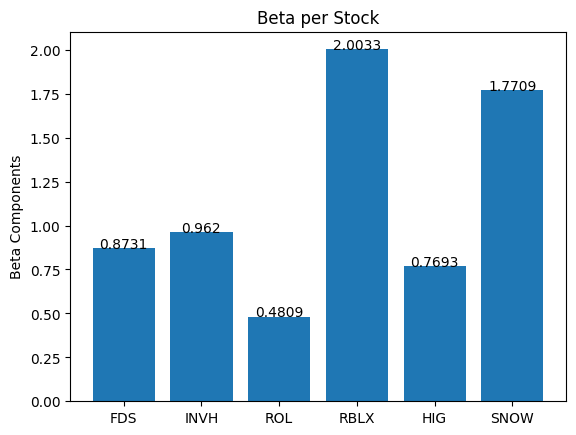

In [41]:
betas = [FDSbeta, INVHbeta,ROLbeta,RBLXbeta, HIGbeta,SNOWbeta]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

algs = symbols
counts = [round(i, 4) for i in betas]  


ax.bar(algs, counts)

ax.set_ylabel('Beta Components')
ax.set_title('Beta per Stock')
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(algs, counts)
plt.show()


In [42]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True)

# Overall Beta Plot 

In [43]:


fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 0.9176,
    mode = "gauge+number+delta",
    title = {'text': "Risk"},
    delta = {'reference': 1},
    gauge = {'axis': {'range': [0, 3]},
             'steps' : [
                 {'range': [0, 1], 'color': "lightgray"},
                 {'range': [1, 3], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 1.0}}))

plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

# Individual Beta Plots

In [51]:
betas = [round(i, 4) for i in betas]
beta_dict = dict(zip(symbols, betas))
beta_dict

{'FDS': 0.8731,
 'INVH': 0.962,
 'ROL': 0.4809,
 'RBLX': 2.0033,
 'HIG': 0.7693,
 'SNOW': 1.7709}

In [59]:
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = beta_dict['SNOW'],
    mode = "gauge+number+delta",
    title = {'text': "Risk for SNOW"},
    delta = {'reference': 1},
    gauge = {'axis': {'range': [0, 3]},
             'steps' : [
                 {'range': [0, 1], 'color': "lightgray"},
                 {'range': [1, 3], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 1.0}}))

plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

In [60]:
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = beta_dict['RBLX'],
    mode = "gauge+number+delta",
    title = {'text': "Risk for RBLX"},
    delta = {'reference': 1},
    gauge = {'axis': {'range': [0, 3]},
             'steps' : [
                 {'range': [0, 1], 'color': "lightgray"},
                 {'range': [1, 3], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 1.0}}))

plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

In [52]:
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 0.8731,
    mode = "gauge+number+delta",
    title = {'text': "Risk for FDS"},
    delta = {'reference': 1},
    gauge = {'axis': {'range': [0, 3]},
             'steps' : [
                 {'range': [0, 1], 'color': "lightgray"},
                 {'range': [1, 3], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 1.0}}))

plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

In [56]:
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = beta_dict['INVH'],
    mode = "gauge+number+delta",
    title = {'text': "Risk for INVH"},
    delta = {'reference': 1},
    gauge = {'axis': {'range': [0, 3]},
             'steps' : [
                 {'range': [0, 1], 'color': "lightgray"},
                 {'range': [1, 3], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 1.0}}))

plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

In [57]:
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = beta_dict['ROL'],
    mode = "gauge+number+delta",
    title = {'text': "Risk for ROL"},
    delta = {'reference': 1},
    gauge = {'axis': {'range': [0, 3]},
             'steps' : [
                 {'range': [0, 1], 'color': "lightgray"},
                 {'range': [1, 3], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 1.0}}))

plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

In [58]:
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = beta_dict['HIG'],
    mode = "gauge+number+delta",
    title = {'text': "Risk for HIG"},
    delta = {'reference': 1},
    gauge = {'axis': {'range': [0, 3]},
             'steps' : [
                 {'range': [0, 1], 'color': "lightgray"},
                 {'range': [1, 3], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 1.0}}))

plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

# Jensen's Index
 # TODO PLS CHECK

In [46]:
def jensen_indx(tot_return, market_return, beta, risk_free_rate=0.0):
    return (tot_return - beta * (market_return-risk_free_rate))/100

In [47]:
m= yf.download('SPY', start, end)
m= m[['Adj Close']]
market_return =m.iloc[-1]-m.iloc[0]
market_return = market_return["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [48]:
tot_return = sum(df[symbols].iloc[-1].values* opt_weights) - sum(df[symbols].iloc[0].values* opt_weights)

In [49]:
beta = 0.6217 # from previous section

jensen_indx(tot_return, market_return, beta)

-0.19987977380315233